Enter the rms value (in N): 0.09
Enter the hofms value (in N): 0.07


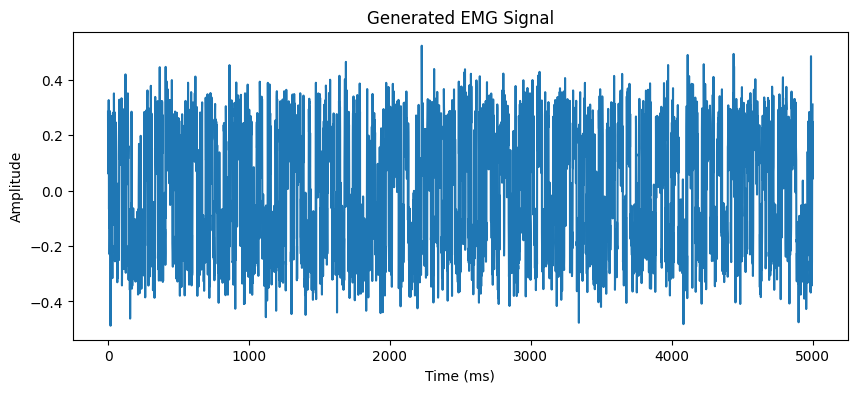

In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

def generate_emg_signal(duration, sampling_rate, num_states, rms, transition_matrix, mean_values, covariance_matrices):
    t = np.linspace(0, duration, int(duration * sampling_rate))
    num_samples = len(t)

    # Generate the state sequence
    states = np.zeros(num_samples, dtype=int)
    current_state = 0
    for i in range(1, num_samples):
        transition_probs = transition_matrix[current_state, :]
        next_state = np.random.choice(num_states, p=transition_probs)
        states[i] = next_state
        current_state = next_state

    # Generate the EMG signal based on the state sequence
    emg_signal = np.zeros(num_samples)
    for i in range(num_samples):
        state = states[i]
        mean = mean_values[state]
        covariance = covariance_matrices[state]
        emg_signal[i] = np.random.normal(loc=mean, scale=rms)  # Add Gaussian noise with RMS value

    return emg_signal

# Set the parameters for the EMG signal generation
duration = 5  # Duration of the signal in seconds
sampling_rate = 1000  # Number of samples per second (sampling frequency)
num_states = 2  # Number of states in the HMM
rms = float(input('Enter the rms value (in N): ')) # Example: Generate random RMS values
hofms_value = float(input('Enter the hofms value (in N): ')) # Example: Generate random 2nd order HOFMs values

# Define the transition matrix for the HMM
transition_matrix = np.array([[0.9, 0.1], [0.1, 0.9]])

# Define the mean values for each state
mean_values = np.array([0.2, -0.2])

# Define the covariance matrices for each state
covariance_matrices = np.array([[[0.1]], [[0.1]]])

# Generate the EMG signal
emg_signal = generate_emg_signal(duration, sampling_rate, num_states, rms, transition_matrix, mean_values, covariance_matrices)

# Plot the generated EMG signal
plt.figure(figsize=(10, 4))
plt.plot(emg_signal)
plt.title("Generated EMG Signal")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.show()